# Logistic Regression Including REFINED Variables

## Compared to the model with all variables, this new model will exclude:

### Number of Stars, Number of Moons, Number of Emission Spectroscopy Measurements, Number of Transmission Spectroscopy Measurements, Discovery Year

In [1]:
import pandas as pd
composite_preprocessed = pd.read_csv('Composite_preprocessed_NO_MV_BALANCED.csv')
composite_preprocessed.head()

,Number of Stars,Number of Planets,Number of Moons,Galactic Latitude [deg],Galactic Longitude [deg],Ecliptic Latitude [deg],Ecliptic Longitude [deg],Number of Photometry Time Series,Number of Radial Velocity Time Series,Number of Stellar Spectra Measurements,Number of Emission Spectroscopy Measurements,Number of Transmission Spectroscopy Measurements,Circumbinary Flag,Controversial Flag,Discovery Year,Detected by Transits
0,3.094076,-0.666894,0.0,2.424559,1.234306,-0.145901,-0.624689,0.613405,1.731519,-0.261600,-0.012466,-0.044364,0,0,2007,0
1,-0.256668,-0.666894,0.0,1.186720,-0.283545,1.148661,-0.992906,0.613405,0.729626,-0.261600,-0.012466,-0.044364,0,0,2009,0
2,-0.256668,-0.666894,0.0,-0.877523,-0.306068,0.308947,-2.327878,0.613405,0.729626,-0.261600,-0.012466,-0.044364,0,0,2008,0
3,-0.256668,0.216988,0.0,1.382856,-0.669803,0.872499,-0.152934,0.613405,3.735304,0.591749,-0.012466,-0.044364,0,0,2002,0
4,6.444820,-0.666894,0.0,0.261241,-0.531444,1.023143,0.855489,0.613405,3.735304,2.298449,-0.012466,-0.044364,0,0,1996,0


# Drop Unnecessary

In [2]:
exclude = ['Number of Stars',
           'Number of Moons',
           'Number of Emission Spectroscopy Measurements',
           'Number of Transmission Spectroscopy Measurements',
           'Discovery Year']
composite_refined = composite_preprocessed.drop(exclude, axis=1)
composite_refined.head()

,Number of Planets,Galactic Latitude [deg],Galactic Longitude [deg],Ecliptic Latitude [deg],Ecliptic Longitude [deg],Number of Photometry Time Series,Number of Radial Velocity Time Series,Number of Stellar Spectra Measurements,Circumbinary Flag,Controversial Flag,Detected by Transits
0,-0.666894,2.424559,1.234306,-0.145901,-0.624689,0.613405,1.731519,-0.261600,0,0,0
1,-0.666894,1.186720,-0.283545,1.148661,-0.992906,0.613405,0.729626,-0.261600,0,0,0
2,-0.666894,-0.877523,-0.306068,0.308947,-2.327878,0.613405,0.729626,-0.261600,0,0,0
3,0.216988,1.382856,-0.669803,0.872499,-0.152934,0.613405,3.735304,0.591749,0,0,0
4,-0.666894,0.261241,-0.531444,1.023143,0.855489,0.613405,3.735304,2.298449,0,0,0


# Examine VIF

## Although we were able to filter out some variables from the model, we should still check VIF (Variance Inflation Factor) to ensure there is no multicollinearity in these remaining variables

## VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors
### A VIF value greater than 5 indicates high multicollinearity

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# we are trying to predict whether an exoplanet has been detected by transits
targets = composite_refined['Detected by Transits']
# training features are all variables except the targets
features = composite_refined.drop(['Detected by Transits'], axis=1)

### Add constant for VIF calculation

In [4]:
features_with_intercept = add_constant(features)

### Calculate VIF

In [5]:
vif_data = pd.DataFrame()
vif_data['Feature'] = features_with_intercept.columns
vif_data['VIF'] = [variance_inflation_factor(features_with_intercept.values, i) for i in range(features_with_intercept.shape[1])]
vif_data

,Feature,VIF
0,const,1.010629
1,Number of Planets,1.055225
2,Galactic Latitude [deg],1.575845
3,Galactic Longitude [deg],2.193902
4,Ecliptic Latitude [deg],3.087144
5,Ecliptic Longitude [deg],1.398842
6,Number of Photometry Time Series,1.091231
7,Number of Radial Velocity Time Series,1.351913
8,Number of Stellar Spectra Measurements,1.398925
9,Circumbinary Flag,1.009265


### Remove features with high VIF (>5)

In [6]:
# tolist converts np array to py list without changing data or dimensions
high_vif_features = vif_data[vif_data['VIF'] > 5]['Feature'].tolist()

# remove high VIF 
features_final = features.drop(high_vif_features, axis=1)

# Train Test Split

## Observe Feature Correlations

In [7]:
features_final.corr()

,Number of Planets,Galactic Latitude [deg],Galactic Longitude [deg],Ecliptic Latitude [deg],Ecliptic Longitude [deg],Number of Photometry Time Series,Number of Radial Velocity Time Series,Number of Stellar Spectra Measurements,Circumbinary Flag,Controversial Flag
Number of Planets,1.000000,-0.055511,0.008589,0.026680,-0.023926,-0.002505,0.082470,0.186263,-0.012547,0.061726
Galactic Latitude [deg],-0.055511,1.000000,-0.019213,0.463063,0.174632,-0.090369,-0.047292,-0.058085,0.009070,-0.016991
Galactic Longitude [deg],0.008589,-0.019213,1.000000,-0.657044,-0.408779,0.131333,0.113682,0.054698,0.025643,0.020641
Ecliptic Latitude [deg],0.026680,0.463063,-0.657044,1.000000,0.498442,-0.222283,-0.139970,-0.104345,-0.028239,-0.013646
Ecliptic Longitude [deg],-0.023926,0.174632,-0.408779,0.498442,1.000000,-0.119612,-0.191094,-0.193637,0.001673,0.000296
Number of Photometry Time Series,-0.002505,-0.090369,0.131333,-0.222283,-0.119612,1.000000,0.174390,0.182466,-0.022719,0.008973
Number of Radial Velocity Time Series,0.082470,-0.047292,0.113682,-0.139970,-0.191094,0.174390,1.000000,0.492154,-0.019551,-0.006469
Number of Stellar Spectra Measurements,0.186263,-0.058085,0.054698,-0.104345,-0.193637,0.182466,0.492154,1.000000,-0.019001,0.020205
Circumbinary Flag,-0.012547,0.009070,0.025643,-0.028239,0.001673,-0.022719,-0.019551,-0.019001,1.000000,0.077366
Controversial Flag,0.061726,-0.016991,0.020641,-0.013646,0.000296,0.008973,-0.006469,0.020205,0.077366,1.000000


## Split data

In [8]:
# Splitting dataset into training and testing addresses overfitting
# shuffling is necessary to remove dependencies that come from order of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_final, targets, train_size = 0.8, random_state = 42)

x_train.shape, y_train.shape

((5148, 10), (5148,))

# Fitting the Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Use L1 regularization (Lasso) for:
### Enhanced feature selection (shrinks some features to exactly 0, simplifying our model with only the most important features
### Handles multicollinearity ; penalizes large coefficients and encourages a sparse model
### Prevents overfitting ; Penalty for large coefficients reduces overfitting especially when number features is large compared to num obs

## Use liblinear solver because:
### Suitable for small-medium sized datasets (uses coordinate descent algorithm, efficient for L1 regularization
### Supports L1 regularization (for logreg with L1 penalty)
### Works great with binary classification problems

## Max iterations: 1000
### This is to ensure our optimization algorithm has enough iterations to reach convergence 
### Logregs especially with regularization require higher number of iterations to find optimal coefficients 
### Avoids premature stopping 

In [10]:
logreg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [11]:
logreg.score(x_train, y_train)

0.858003108003108

### 85% of the model's training outputs match the targets!
### Still important to manually calculate the accuracy

In [12]:
model_outputs = logreg.predict(x_train)
# view the predicted class labels of the regression
model_outputs

array([0, 1, 1, ..., 0, 0, 0])

In [13]:
model_outputs == y_train

915      True
5904    False
2083     True
2480     True
509      True
        ...  
3772     True
5191     True
5226     True
5390     True
860      True
Name: Detected by Transits, Length: 5148, dtype: bool

In [14]:
# sum to measure correct predictions
import numpy as np
# number correct / total number model predictions
np.sum([model_outputs == y_train]) / model_outputs.shape[0]

0.858003108003108

### Same accuracy!

# Analyze Summary Table with coefficients (weights) and intercept (bias)

In [15]:
logreg.intercept_, logreg.coef_

(array([-2.19206902]),
 array([[ 0.56920302, -0.18382222,  0.42632943,  1.80310468,  0.40662947,
         -3.95763958, -3.03723533, -3.3002015 , -3.30657616, -2.73140938]]))

### Match up coefs with features

In [16]:
feature_name = features_final.columns.values
summary_table = pd.DataFrame(columns=['Feature Name'], data = feature_name)

### Transpose bc by default np arrays are rows and not columns

In [17]:
summary_table['Coefficients'] = np.transpose(logreg.coef_)

### Insert intercept as 0th index ; Move all indices up by 1 

In [18]:
summary_table.index += 1
summary_table.loc[0] = ['Intercept', logreg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficients
0,Intercept,-2.192069
1,Number of Planets,0.569203
2,Galactic Latitude [deg],-0.183822
3,Galactic Longitude [deg],0.426329
4,Ecliptic Latitude [deg],1.803105
5,Ecliptic Longitude [deg],0.406629
6,Number of Photometry Time Series,-3.957640
7,Number of Radial Velocity Time Series,-3.037235
8,Number of Stellar Spectra Measurements,-3.300202
9,Circumbinary Flag,-3.306576


## The closer the coefficient is to 0, the less impact (less weight on the model) 
## Now we calculate log odds 
## Log odds tell us the strength of the relationship between the feature and the outcome (detected by transits T/F)

In [19]:
summary_table['Odds_ratio'] = np.exp(summary_table['Coefficients'])
summary_ordered = summary_table.sort_values('Odds_ratio', ascending=False)
summary_ordered

,Feature Name,Coefficients,Odds_ratio
4,Ecliptic Latitude [deg],1.803105,6.068459
1,Number of Planets,0.569203,1.766858
3,Galactic Longitude [deg],0.426329,1.531625
5,Ecliptic Longitude [deg],0.406629,1.501748
2,Galactic Latitude [deg],-0.183822,0.832084
0,Intercept,-2.192069,0.111685
10,Controversial Flag,-2.731409,0.065127
7,Number of Radial Velocity Time Series,-3.037235,0.047967
8,Number of Stellar Spectra Measurements,-3.300202,0.036876
9,Circumbinary Flag,-3.306576,0.036641


## A feature is not important if:
## Coef ~ 0 (means this coefficient, even at its highest value will have close to 0 effect on the outcome);
## Odds ratio ~ 1 (means this coefficient, even at its highest value will only have minimal effect on the odds of the outcome)

# Calculating P-values

### Using Logistic Regression from statsmodels for more in-depth statistical analysis and interpretation of the model coefficients

In [20]:
import statsmodels.api as sm

# add constant to prevent singular matrix error
x_train_with_intercept = sm.add_constant(x_train)

# Train (fit) the model and print summary
# Use regularization technique L1 Lasso to address quasi-separation and prevents coefficients from becoming too large
sm_logreg = sm.Logit(y_train, x_train_with_intercept).fit_regularized(method='l1',maxiter=1000)
sm_logreg.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28788294955004284
            Iterations: 74
            Function evaluations: 74
            Gradient evaluations: 74


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Detected by Transits   No. Observations:                 5148
Model:                            Logit   Df Residuals:                     5137
Method:                             MLE   Df Model:                           10
Date:                  Thu, 27 Jun 2024   Pseudo R-squ.:                  0.5847
Time:                          11:35:16   Log-Likelihood:                -1482.0
converged:                         True   LL-Null:                       -3568.3
Covariance Type:              nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.6711      0.380     -7.021      0.000      -3.417      -1.925
Number of Planets                          0.5892      0.063      9.304      0.000       0.465       0.713
Galactic Latitude [deg]                   -0.1884      0.055     -3.400      0.001      -0.297      -0.080
Galactic Longitude [deg]                   0.4357      0.056      7.727      0.000       0.325       0.546
Ecliptic Latitude [deg]                    1.8215      0.078     23.497      0.000       1.670       1.973
Ecliptic Longitude [deg]                   0.4091      0.056      7.367      0.000       0.300       0.518
Number of Photometry Time Series          -4.0818      0.286    -14.259      0.000      -4.643      -3.521
Number of Radial Velocity Time Series     -3.6728      0.781     -4.705      0.000      -5.203      -2.143
Number of Stellar Spectra Measurements    -4.3771      1.168     -3.748      0.000      -6.666      -2.088
Circumbinary Flag                         -3.9059      0.819     -4.769      0.000      -5.511      -2.301
Controversial Flag                        -3.2925      0.752     -4.378      0.000      -4.767      -1.818
==========================================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# ROC-AUC Score

In [21]:
# predict on the test set
y_pred = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)[:,1]
roc_auc = metrics.roc_auc_score(y_test, y_prob)
roc_auc

0.9357346625286058

# Confusion Matrix

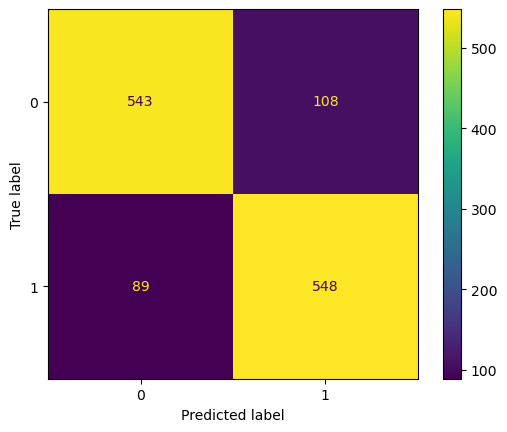

In [22]:
import matplotlib.pyplot as plt
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Cross validation
### Ensuress model's performance is robust and not overly dependent on a single test-train split

In [23]:
from sklearn.model_selection import cross_val_score
# specify 5-fold cv
# splits data into 5 parts; training model on 4 and validating on 5th
# repeats process 5 times
# end result; an average performance metric that provides better estimate of the model's performance 
cv_score = cross_val_score(logreg, x_train, y_train, cv=5) 
print('cv score:', cv_score)
print('mean cv score:', np.mean(cv_score))

cv score: [0.85631068 0.84854369 0.85145631 0.86880466 0.86297376]
mean cv score: 0.8576178210535254


# Hyperparameter Tuning
### Use gridsearch to find optimal hyperparameters for the model
### penalty: regularization l1 or l2
### C: list of possible values for the inverse of regularization strength 
#### Smaller values of C imply stronger regularization (to prevent overfitting), while larger values imply weaker regularization (allowing the model to fit the training data more closely)
### solver: algorithm to use in the optimization problem (liblinear is suitable for small datasets and supports l1 and l2 regularization)

In [24]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'penalty' : ['l1','l2'],
    'C' : [0.1, 1, 10, 100],
    'solver' : ['liblinear']
}

grid_search = GridSearchCV(logreg, parameter_grid, cv=5, scoring = 'accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

## Concluding the Logistic Regression
### used VIF to identify and remove features with high multicollinearity to ensure model stability
### logistic regression machine learning model with l1 regularization was trained using the 'liblinear' solver
### GridSearchCV found the optimal parameter values for penalty, regularization strength and solver 
### Model achieved mean cross-validation score of 0.8576, which indicates good overall performance 
### The confusion matrix and metrics show a balanced performance with high precision and recall for both classes
### Precision class 1 = TP / TP + FP = 548 / 548+108 = 0.835
### Recall class 1 = TP / TP + FN = 548 / 548+89 = 0.861
### Precision class 0 = TN / TN + FN = 543 / 543+89 = 0.859
### Recall class 0 = TN / TN + FP = 543 / 543+108 = 0.834
### ROCAUC score is 0.935
### The high ROC-AUC score and balanced precision and recall metrics indicate that the model is effective at distinguishing between exoplanets discovered by transits and those discovered by other means
### The confusion matrix revealed that the model has a relatively low number of false positives and false negatives, highlighting the model's reliability